In [1]:
from qtpg.team import Team
from qtpg.learner import Learner
from qtpg.program import Program
from qtpg.rule import Rule
from qtpg.figure13 import Figure13
from qtpg.figure13_hole_in_wall import Figure13HoleInWall
from qtpg.figure12 import Figure12
from qtpg.figure9 import Figure9
from qtpg.figureRandom import FigureRandom
from qtpg.figureHeywood import FigureHeywood
from qtpg.search_manager import SearchManager
import numpy as np
import uuid
import copy
import matplotlib.pyplot as plt

In [2]:
gp_query_env = 0
gp_query_runs = []

In [3]:
# env params
memorySize = 40
legalMove = 0.1
illegalMove = -0.01
outOfBounds = 0.0
memoryRepeat = -0.01
# memoryRepeat = 0.0
goalReached = 100

envName = 'Figure 13'
env = Figure13(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 13 Hole in Wall'
# env = Figure13HoleInWall(5, 5, (2, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 12'
# env = Figure12(5, 5, (4, 4), (0, 0), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Figure 9'
# env = Figure9(10, 10, (4, 9), (0, 3), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Heywood'
# env = FigureHeywood(10, 10, (4, 4), (0, 4), memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# envName = 'Random'
# env = FigureRandom(50, 50, memorySize, legalMove, illegalMove, outOfBounds, memoryRepeat, goalReached)
# env.shake(0.2)

In [4]:
# env.save()

In [5]:
# env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
import random
# new start-goal parameter generator... might want to put this in .env file, where a new id gets generated...
new_start = (0, 0)
new_goal = (0, 0)

while new_start == (0, 0) or new_start in env.illegal_states:
    new_start = (random.randint(0, env.rows-1), random.randint(0, env.cols-1))

while new_goal == (0, 0) or new_goal in env.illegal_states:
    new_goal = (random.randint(0, env.rows-1), random.randint(0, env.cols-1))
    
print(f'New start: {new_start}')
print(f'New goal: {new_goal}')

New start: (3, 4)
New goal: (4, 4)


In [6]:
envName = ''
# envName = '20x20#1sg#1'
# 20x20 #1
# start-goal #1 for 20x20 #1 --> default load
if envName == '20x20#1sg#1':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51')
# start-goal #2 for 20x20 #1
elif envName == '20x20#1sg#2':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (15, 15)
    env.current_state = env.start_state
    env.win_state = (3, 8)
    env.display()
# start-goal #3 for 20x20 #2
elif envName == '20x20#1sg#3':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (12, 19)
    env.current_state = env.start_state
    env.win_state = (9, 13)
    env.display()
elif envName == '20x20#1sg#4':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (15, 17)
    env.current_state = env.start_state
    env.win_state = (0, 15)
    env.display()
elif envName == '20x20#1sg#5':
    env.load('592726fe-a9e1-46fc-99c3-fc97ffeb4b51', False)
    env.start_state = (15, 11)
    env.current_state = env.start_state
    env.win_state = (10, 7)
    env.display()
elif envName == '20x20#2sg#1':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301')
elif envName == '20x20#2sg#2':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (10, 2)
    env.current_state = env.start_state
    env.win_state = (6, 18)
    env.display()
elif envName == '20x20#2sg#3':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (0, 15)
    env.current_state = env.start_state
    env.win_state = (14, 0)
    env.display()
elif envName == '20x20#2sg#4':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (9, 4)
    env.current_state = env.start_state
    env.win_state = (15, 0)
    env.display()
elif envName == '20x20#2sg#5':
    env.load('00840a8c-af04-4a3e-b427-451ab41f3301', False)
    env.start_state = (14, 16)
    env.current_state = env.start_state
    env.win_state = (8, 5)
    env.display()
elif envName == '20x20#3sg#1':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f')
elif envName == '20x20#3sg#2':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (7, 9)
    env.current_state = env.start_state
    env.win_state = (17, 10)
    env.display()
elif envName == '20x20#3sg#3':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (3, 2)
    env.current_state = env.start_state
    env.win_state = (0, 14)
    env.display()
elif envName == '20x20#3sg#4':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (0, 13)
    env.current_state = env.start_state
    env.win_state = (15, 18)
    env.display()
elif envName == '20x20#3sg#5':
    env.load('2ca23d5d-788e-44df-9ca1-96b18b9c223f', False)
    env.start_state = (1, 8)
    env.current_state = env.start_state
    env.win_state = (3, 14)
    env.display()
# 50x50s
elif envName == '50x50#1sg#1':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694')
elif envName == '50x50#1sg#2':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (16, 46)
    env.current_state = env.start_state
    env.win_state = (20, 1)
    env.display()
elif envName == '50x50#1sg#3':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (3, 12)
    env.current_state = env.start_state
    env.win_state = (14, 43)
    env.display()
elif envName == '50x50#1sg#4':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (37, 17)
    env.current_state = env.start_state
    env.win_state = (20, 46)
    env.display()
elif envName == '50x50#1sg#5':
    env.load('f5e46ad0-c274-415c-b831-7b1893ea9694', False)
    env.start_state = (20, 11)
    env.current_state = env.start_state
    env.win_state = (42, 25)
    env.display()

In [7]:
numGens = 50
# maxTeamPool = 5
maxTeamPool = 5
runs = 5
# init search manager and starting teams

# searchManager = SearchManager(maxTeamPool)

# variables for tracking fitness, for curves
scores = []
gens = []
maxes = []
averages = []
mins = []

run_winners = []
runs_score_track = []

for run in range(runs):
    maxes = []
    averages = []
    mins = []
    gens = []
    print(run)
    # init everything for new run
    searchManager = SearchManager(maxTeamPool)
    
    adam_and_eve = []
    env.reset()
    init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
    init_team.init_search(env, [2, 3])
#     adam_and_eve.append(init_team)
#     init_team = Team(uuid.uuid4(), 0, 0, 1, 1, 0)
#     init_team.init_search(env, [0, 1])
    adam_and_eve.append(init_team)
    win = False
    for adam in adam_and_eve:
        data = [adam, win]
        searchManager.evaluate_team(data)
    
    
    average_coverage = 0.0
    gen = 0
    for gen in range(numGens):
#     while (average_coverage < 0.7) and (len(searchManager.winners) < maxTeamPool):
#         print(average_coverage)
#         print('winners so far:')
#         print(searchManager.winners)
        print(f'GEN --> {gen}')
        gen += 1
        toEvaluateAfterGen = []
        scores = []
        # get it started
        for parent in searchManager.teamPool:
            # only run if the team has not yet won
            if parent not in searchManager.winners:
                env.current_state = parent.start_state

                # make offspring from parent, then let that offspring make a new rule
                child = copy.deepcopy(parent)
                child.gp_query_env = parent.gp_query_env # probably don't need this, can test later
                child.id = uuid.uuid4()
                win = child.search_no_back_track(env)
                
                if child.mostRecent.program.rule.region[3] - child.mostRecent.program.rule.region[2] >= 0:
                    gp_query_env += (child.mostRecent.program.rule.region[3] - child.mostRecent.program.rule.region[2]) + 1
                toEvaluateAfterGen.append([child, win])
                scores.append(child)
            else:
                scores.append(parent)

        for data in toEvaluateAfterGen:
            searchManager.evaluate_team(data)
        # start: manage fitness curves (at end of gen)
        gens.append(gen)
        total = 0
        max_fitness = -100
        min_fitness = 100

        for team in scores:
            total += team.fitness
            if team.fitness > max_fitness:
                max_fitness = team.fitness
            if team.fitness < min_fitness:
                min_fitness = team.fitness
        average_fitness = total / len(searchManager.teamPool)
        maxes.append(max_fitness)
        averages.append(average_fitness)
        mins.append(min_fitness)
        
        # find average region coverage
        total_coverage = 0.0
        for team in searchManager.teamPool:
            total_coverage += team.coverage([env.rows, env.cols], env.illegal_states)
        average_coverage = total_coverage / len(searchManager.teamPool)

    runs_score_track.append({'run': run, 'maxes': maxes, 'averages': averages, 'mins': mins})
    
    run_winners.append({'run': run, 'winners': searchManager.winners})
    gp_query_runs.append(gp_query_env)

0
GEN --> 0
------
10
[1, 2, 0, 4]
------
[1, 2, 0, 4]
GEN --> 1
------
10
[1, 2, 0, 4]
------
[1, 2, 0, 4]
------
8
[0, 4, 0, 4]
------
[0, 4, 0, 4]
GEN --> 2
no steps!
------
2
[1, 3, 0, 0]
------
[1, 3, 0, 0]
------
4
[0, 1, 0, 2]
------
[0, 1, 0, 2]
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
3
[1, 4, 2, 4]
------
[1, 4, 2, 4]
GEN --> 3
no steps!
------
2
[1, 4, 0, 0]
------
[1, 4, 0, 0]
------
8
[0, 4, 0, 4]
------
[0, 4, 0, 4]
no steps!
------
2
[1, 3, 4, 4]
------
[1, 3, 4, 4]
------
9
[1, 2, 0, 4]
------
[1, 2, 0, 4]
GEN --> 4
------
4
[1, 1, 0, 1]
------
[1, 1, 0, 1]
no steps!
------
2
[1, 3, 4, 4]
------
[1, 3, 4, 4]
------
6
[1, 2, 0, 4]
------
[1, 2, 0, 4]
no steps!
------
2
[0, 2, 2, 2]
------
[0, 2, 2, 2]
GEN --> 5
------
5
[0, 1, 0, 2]
------
[0, 1, 0, 2]
no steps!
------
2
[0, 3, 2, 2]
------
[0, 3, 2, 2]
no steps!
------
2
[1, 3, 4, 4]
------
[1, 3, 4, 4]
------
6
[0, 1, 0, 2]
------
[0, 1, 0, 2]
GEN --> 6
------
4
[1, 0, 0, 1]
------
[1, 0, 0, 1]
------
8
[0, 4, 

------
3
[1, 1, 0, 1]
------
[1, 1, 0, 1]
------
6
[0, 1, 0, 2]
------
[0, 1, 0, 2]
no steps!
------
2
[0, 3, 0, 0]
------
[0, 3, 0, 0]
GEN --> 23
no steps!
------
2
[0, 3, 2, 2]
------
[0, 3, 2, 2]
no steps!
------
2
[0, 3, 2, 2]
------
[0, 3, 2, 2]
------
3
[1, 0, 0, 1]
------
[1, 0, 0, 1]
------
4
[1, 0, 0, 1]
------
[1, 0, 0, 1]
------
10
[1, 2, 0, 4]
------
[1, 2, 0, 4]
GEN --> 24
------
6
[0, 1, 0, 2]
------
[0, 1, 0, 2]
no steps!
------
2
[0, 2, 2, 2]
------
[0, 2, 2, 2]
------
3
[1, 3, 0, 0]
------
[1, 3, 0, 0]
------
6
[0, 1, 0, 2]
------
[0, 1, 0, 2]
no steps!
------
2
[1, 3, 0, 0]
------
[1, 3, 0, 0]
GEN --> 25
------
6
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
7
[1, 2, 0, 4]
------
[1, 2, 0, 4]
------
7
[1, 2, 0, 4]
------
[1, 2, 0, 4]
no steps!
------
2
[0, 3, 2, 2]
------
[0, 3, 2, 2]
------
10
[1, 2, 0, 4]
------
[1, 2, 0, 4]
GEN --> 26
no steps!
------
2
[0, 3, 2, 2]
------
[0, 3, 2, 2]
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
7
[1, 2, 0, 4]
------
[1, 2, 0, 4]
no

------
4
[0, 1, 0, 2]
------
[0, 1, 0, 2]
------
10
[0, 4, 0, 4]
------
[0, 4, 0, 4]
------
10
[1, 2, 0, 4]
------
[1, 2, 0, 4]
GEN --> 23
------
2
[1, 4, 2, 4]
------
[1, 4, 2, 4]
------
4
[1, 1, 0, 1]
------
[1, 1, 0, 1]
------
8
[0, 4, 0, 4]
------
[0, 4, 0, 4]
------
3
[1, 1, 0, 1]
------
[1, 1, 0, 1]
------
10
[1, 2, 0, 4]
------
[1, 2, 0, 4]
GEN --> 24
------
3
[1, 0, 3, 4]
------
[1, 0, 3, 4]
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
10
[1, 2, 0, 4]
------
[1, 2, 0, 4]
------
6
[0, 1, 0, 2]
------
[0, 1, 0, 2]
GEN --> 25
------
4
[1, 1, 0, 1]
------
[1, 1, 0, 1]
------
7
[1, 2, 0, 4]
------
[1, 2, 0, 4]
------
6
[1, 2, 0, 4]
------
[1, 2, 0, 4]
------
6
[0, 1, 0, 2]
------
[0, 1, 0, 2]
GEN --> 26
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
9
[1, 2, 0, 4]
------
[1, 2, 0, 4]
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
8
[0, 4, 0, 4]
------
[0, 4, 0, 4]
GEN --> 27
no steps!
------
2
[0, 3, 2, 2]
------
[0, 3, 2, 2]
------
3
[1, 1, 0, 1]
------
[1, 1, 0, 1]
no step

------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
GEN --> 25
no steps!
------
2
[1, 3, 0, 0]
------
[1, 3, 0, 0]
------
6
[1, 2, 0, 4]
------
[1, 2, 0, 4]
------
3
[1, 1, 0, 1]
------
[1, 1, 0, 1]
------
8
[0, 4, 0, 4]
------
[0, 4, 0, 4]
GEN --> 26
no steps!
------
2
[1, 1, 4, 4]
------
[1, 1, 4, 4]
------
9
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
4
[1, 1, 0, 1]
------
[1, 1, 0, 1]
------
8
[0, 4, 0, 4]
------
[0, 4, 0, 4]
GEN --> 27
------
2
[1, 4, 2, 4]
------
[1, 4, 2, 4]
------
9
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
7
[0, 0, 0, 4]
------
[0, 0, 0, 4]
no steps!
------
2
[1, 4, 0, 0]
------
[1, 4, 0, 0]
GEN --> 28
------
4
[1, 1, 0, 1]
------
[1, 1, 0, 1]
------
3
[1, 0, 0, 1]
------
[1, 0, 0, 1]
------
10
[1, 2, 0, 4]
------
[1, 2, 0, 4]
GEN --> 29
------
8
[0, 0, 0, 4]
------
[0, 0, 0, 4]
------
5
[0, 1, 0, 2]
------
[0, 1, 0, 2]
------
6
[1, 2, 0, 4]
------
[1, 2, 0, 4]
GEN --> 30
no steps!
------
2
[0, 3, 2, 2]
------
[0, 3, 2, 2]
------
4
[1, 0, 0, 1]
------
[1, 0, 0, 1]
no steps!
-

In [8]:
#fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for average in averages:
#     y.append(average)
# plt.xlabel('Generation')
# plt.ylabel('Average Score')
# plt.plot(x, y)
# plt.show()

In [9]:
# #fitness curves
# x = []
# y = []
# for gen in gens:
#     x.append(gen)

# for max_ in maxes:
#     y.append(max_)
# plt.xlabel('Generation')
# plt.ylabel('Max Score')
# plt.plot(x, y)
# plt.show()

In [10]:
# for team in searchManager.winners:
#     print('$$$$$$$$$$$$$ winnnnnner start $$$$$$$$$$$$$$$$$$$$')
#     print(team.fitness)
#     print('Learners:')
#     for learner in team.learners:
#         print(f'Region: {learner.program.rule.region} --> Action: {learner.program.rule.action_set}')
#     print('$$$$$$$$$$$$$ winnnnnner end $$$$$$$$$$$$$$$$$$$$')

In [11]:
for team in searchManager.winners:
    # importing libraries
    from mpl_toolkits import mplot3d
    import numpy as np
    import matplotlib.pyplot as plt

    region_action_scores = []
    for learner in team.learners:
        if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
            region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
        else:
            region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

    sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)
    # print(sorted_region_action_scores)
    # for record in sorted_region_action_scores:
    #     print(record)
    action_states = []
    for record in sorted_region_action_scores:
        action = ''
        if record['action'] == 0:
            action = '\u2191'
        elif record['action'] == 1:
            action = '\u2193'
        elif record['action'] == 2:
            action = '\u2192'
        elif record['action'] == 3:
            action = '\u2190'

        for i in range(record['region'][3] - record['region'][2]+1):
            state = [0, 0]
            state[record['region'][0]] = record['region'][1]
            state[not record['region'][0]] = record['region'][2] + i

            # ensure we do not enter duplicate states
            found = 0
            for pair in action_states:
                if pair['state'] == (state[0], state[1]):
                    found = 1

            if found == 0:
                action_states.append({'state': (state[0], state[1]), 'action': action, 'q': record['q'] })

    # add in the rest of the states, either they are not visited, or illegal
#     for n in reversed(range(env.rows)):
#         for m in range(env.cols):
#             action = ''
#             found = 0
#             for record in action_states:
#                 if record['state'] == (n, m):
#                     found = 1
#                     action = record['action']
#     #                 action = float(round(record['q'], 0))
#             if found == 0:
#                 if not env.check_legal((n, m)):
#                     action = 'X'
#                 else:
#                     action = '?'
#             print(f'{action} ', end='')
#         print('\n')
#     print('------------NEW WINNER ----------------')

## Average Max Fitness Curves

In [12]:
print(runs_score_track[0]['maxes'][0])
print(len(runs_score_track))
print(len(runs_score_track[0]))
print(len(runs_score_track[0]['maxes']))

1.51
5
4
50


In [13]:
# #fitness curves
# x = []
# y = []
# average_maxes = np.zeros(numGens)
# # average_maxes = np.zeros(100)

# for i in range(len(gens)):
#     for q in range(len(runs_score_track)):
#         average_maxes[i] += runs_score_track[q]['maxes'][i]
#     average_maxes[i] /= len(runs_score_track)
    
# for gen in gens:
#     x.append(gen)

# plt.title(f'Average max score over {len(runs_score_track)} runs for {envName}')
# plt.xlabel('Generation')
# plt.ylabel('Average Max Score')
# plt.plot(x, average_maxes)
# plt.show()

## Reinforcement Learning + Victory Lap

In [14]:
# print(run_winners)
# for winner in run_winners[0]['winners']:
#     for learner in winner.learners:
#         print(learner.program.rule.region)
#     print('\n\n\n')
# for learner in team.learners:
#     print(learner.program.rule.region)

In [15]:
# for i in range(len(run_winners[0]['winners'])):
#     for learner in run_winners[0]['winners'][i].learners:
#         print(learner.id)
#     print('\n')

In [16]:
# team = searchManager.winners[0]



# team = run_winners[0]['winners'][0]
for run in range(runs):
    for team in run_winners[run]['winners']:
        print('NEW CHAMPION!')
        print(f'Run: {run}')
        print(f'Winner: {team.id}')
        team.discount = 0.9
        team.alpha = 0.5
        # for learner in team.learners:
        #     print(learner.program.rule.region)

        # team.prune_single_cell_regions() # don't think this is good...
        team.prune_duplicate_regions()

        # illegal_states = [(2, 0), (2, 1), (3, 1), (1, 3), (2, 3), (3, 3), (1, 4)]
        illegal_states = env.illegal_states
        dimensions = [env.rows, env.cols]

        print(env.start_state)
        print(env.win_state)
        for i in range(env.rows):
        #     print(f'Epoch: {i+1} --------')
        #     env.reset()
            current_state = env.start_state
        #     print(f'curr -> {env.current_state}')
            win = False
            selected_learner = team.select_learner(current_state, [0, 0, 0, 0])
            while not win:
                if selected_learner != None:
            #         win, needs_update, reward, winning_action = team.q_evaluation(env, selected_learner)
                    win, needs_update, reward, winning_action, current_state = team.q_evaluation(current_state, selected_learner, illegal_states, dimensions)
                    if not win:
                        selected_learner = team.select_learner(current_state, selected_learner.program.rule.region)
                        team.transition_update(reward, winning_action, needs_update, selected_learner)
                else:
                    print('eek!')
                    break

            team.final_update(reward, winning_action, needs_update)
        print(win)
        for learner in team.learners:
            print(f'{learner.program.rule.region}')
            for i in range(len(learner.program.rule.action_set)):
                  print(f'{learner.program.rule.action_set[i]} --> {learner.program.rule.value_set[i]}')

NEW CHAMPION!
Run: 0
Winner: 75c494b9-e090-42f9-888e-bed5cc66e88a
(0, 0)
(2, 4)
win!
win!
win!
win!
win!
True
[0, 0, 0, 1]
2 --> 13.689800000000002
3 --> 0
[0, 0, 3, 4]
2 --> 0
3 --> 0
[1, 2, 0, 3]
0 --> 40.517
1 --> 0
[0, 4, 0, 3]
2 --> 73.13468750000001
3 --> 0
[1, 4, 2, 4]
0 --> 0
1 --> 96.875
NEW CHAMPION!
Run: 0
Winner: ab9df225-63e0-4854-883a-2d8545354869
(0, 0)
(2, 4)
win!
win!
win!
win!
win!
True
[0, 0, 0, 1]
2 --> 12.086980105537112
3 --> 0
[0, 0, 3, 4]
2 --> 0
3 --> 0
[1, 2, 0, 3]
0 --> 0.009750000000000002
1 --> 0
[0, 4, 0, 1]
2 --> 0
3 --> 0
[0, 4, 3, 4]
2 --> 0
3 --> 20.306819219616603
[1, 2, 0, 3]
0 --> 32.28658017161915
1 --> 0
[0, 4, 0, 3]
2 --> 57.15691122315391
3 --> 0
[1, 4, 2, 4]
0 --> 0
1 --> 96.875
NEW CHAMPION!
Run: 0
Winner: 802170b0-239f-4da7-8f7d-61d593dc08a0
(0, 0)
(2, 4)
win!
win!
win!
win!
win!
True
[0, 0, 0, 1]
2 --> 0.030224598985126416
3 --> 0
[0, 0, 3, 4]
2 --> 0
3 --> 0
[1, 2, 0, 0]
0 --> 0.03270349963844656
1 --> 0
[1, 2, 2, 4]
0 --> 0
1 --> 0.0356910

win!
True
[0, 0, 0, 0]
2 --> 1.3175516045558318
3 --> 0
[0, 0, 2, 4]
2 --> 0
3 --> 0.7845008219668756
[1, 1, 0, 0]
0 --> 0.3591416879919437
1 --> 0
[0, 1, 0, 0]
2 --> 0.0075
3 --> 0
[0, 1, 2, 2]
2 --> 0
3 --> 0.3711540736055482
[1, 1, 0, 0]
0 --> 0.432125740050301
1 --> 0
[0, 1, 1, 2]
2 --> 0
3 --> 0.3708428758677331
[1, 0, 1, 1]
0 --> 0
1 --> 0.41039235747347785
[0, 0, 1, 4]
2 --> 0
3 --> 1.1947173120112045
[1, 0, 1, 1]
0 --> 0
1 --> 0.5260728930893435
[0, 0, 0, 1]
2 --> 1.1194463786828406
3 --> 0
[0, 0, 3, 4]
2 --> 0
3 --> 0
[1, 2, 0, 0]
0 --> 0.8456763943273637
1 --> 0
[1, 2, 2, 4]
0 --> 0
1 --> 0.610567157241615
[0, 1, 0, 1]
2 --> 0.4066402327492894
3 --> 0
[1, 2, 0, 3]
0 --> 2.325482194403363
1 --> 0
[0, 4, 0, 1]
2 --> 0
3 --> 0
[0, 4, 3, 4]
2 --> 0
3 --> 1.4534624026565028
[1, 2, 0, 0]
0 --> 1.4527933010921128
1 --> 0
[1, 2, 2, 4]
0 --> 0
1 --> 2.3892818166441074
[0, 1, 0, 1]
2 --> 0.9039484047154138
3 --> 0
[1, 2, 0, 0]
0 --> 2.9263358212226924
1 --> 0
[1, 2, 2, 4]
0 --> 0
1 -->

## State Action Map (RL)

Run: 0
Team: 75c494b9-e090-42f9-888e-bed5cc66e88a
→ → → → ↓ 

? X ↑ X ↓ 

X X ↑ X ↓ 

? ? ↑ X X 

→ → ↑ ← ← 



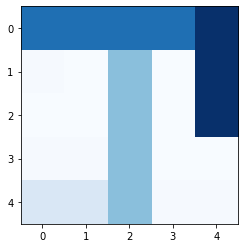

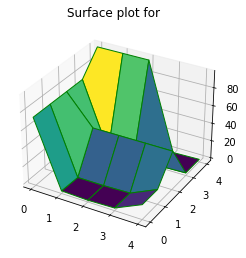

Run: 0
Team: ab9df225-63e0-4854-883a-2d8545354869
→ → → → ↓ 

? X ↑ X ↓ 

X X ↑ X ↓ 

? ? ↑ X X 

→ → ↑ ← ← 



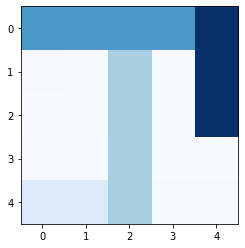

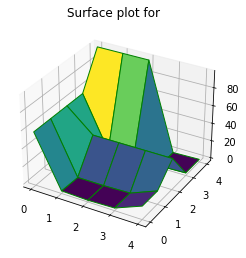

Run: 0
Team: 802170b0-239f-4da7-8f7d-61d593dc08a0
→ → → → ↓ 

↓ X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

→ → ↑ ← ← 



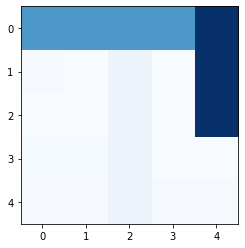

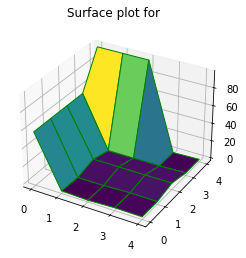

Run: 0
Team: 8e38207a-d768-4e91-ac9d-04bac0751865
→ → → → ↓ 

↓ X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

→ ← ↑ ← ← 



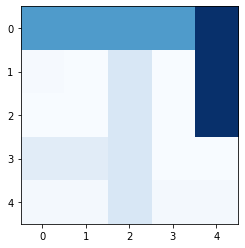

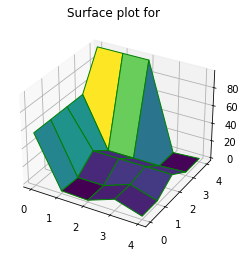

Run: 0
Team: 12341464-008c-46a2-a628-284d4f9b87b9
→ → → → ↓ 

↓ X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

↑ → ↑ ← ← 



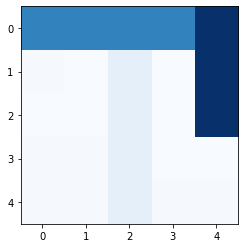

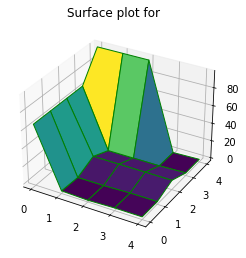

Run: 1
Team: bd3254d7-8aa1-4a8b-aa4b-c57cce1c3133
→ → → → ↓ 

? X ↑ X ↓ 

X X ↑ X ↓ 

↓ → ↑ X X 

→ ← ↑ ← ← 



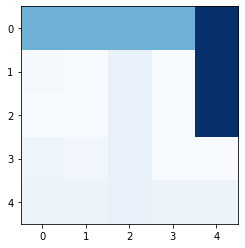

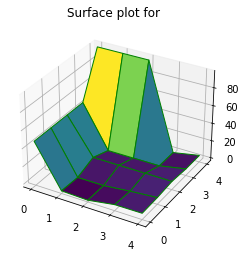

Run: 1
Team: 231f0f85-7b96-4bb8-ad55-929d05ca2789
→ → → → ↓ 

? X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

→ → ↑ ← ← 



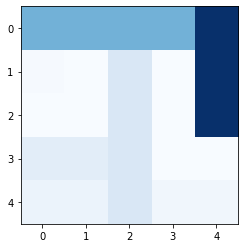

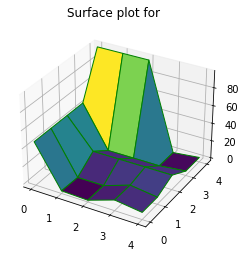

Run: 1
Team: 0d57321b-9bfd-4797-bab9-9635cffb8ba2
→ → → → ↓ 

? X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

→ → ↑ ← ← 



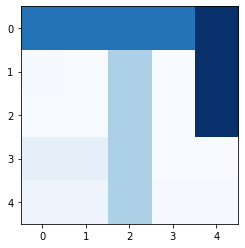

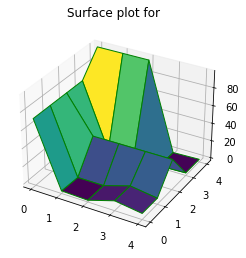

Run: 1
Team: c7387e3a-0aa1-409b-8b4a-504fe77a9e66
→ → → → ↓ 

↓ X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

→ → ↑ ← ← 



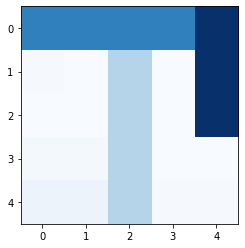

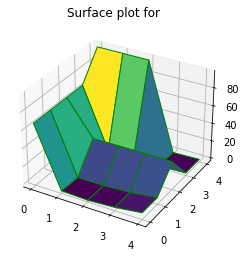

Run: 2
Team: c3e0601e-f0e8-45dd-8f38-f663ed43faa4
→ → → → ↓ 

↓ X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

→ ← ↑ ← ← 



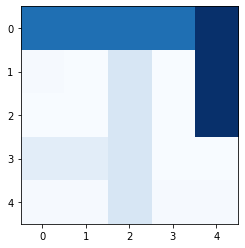

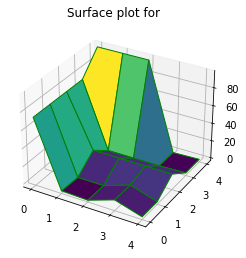

Run: 3
Team: 84003b13-1bb9-4d09-81b5-7bf794ea5402
→ → → → ↓ 

↓ X ↑ X ↓ 

X X ↑ X ↓ 

↓ ← ↑ X X 

→ → ↑ ← ← 



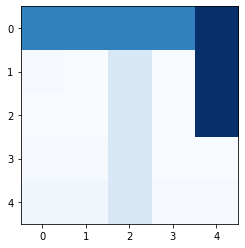

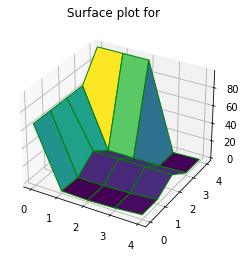

Run: 3
Team: 412214ae-4db5-45d2-ac92-8194c9c98c62
→ → → → ↓ 

? X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

→ → ↑ ← ← 



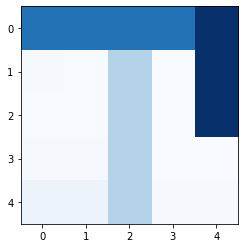

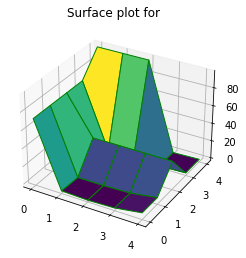

Run: 3
Team: ba06b03a-1716-4b73-a60c-59277afdbc31
→ → → → ↓ 

? X ↓ X ↓ 

X X ↓ X ↓ 

→ ↓ ↑ X X 

→ → ↑ ← ← 



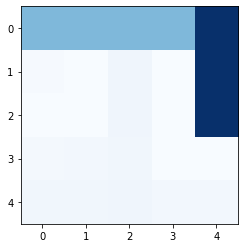

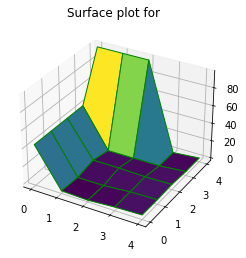

Run: 4
Team: cfdaa0e0-01f4-4f40-97ae-5e3b523e6b1d
→ → → → ↓ 

? X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

↑ → ↑ ← ← 



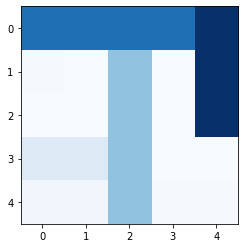

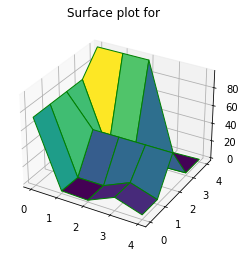

Run: 4
Team: cdf20ae3-35ac-4b1a-9240-adf2d05b73d6
→ → → → ↓ 

? X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

→ → ↑ ← ← 



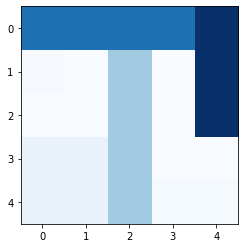

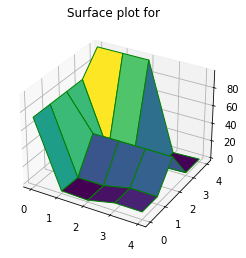

Run: 4
Team: 154ee906-68c9-44ff-9f37-9888f0faa639
→ → → → ↓ 

? X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

→ → ↑ ← ← 



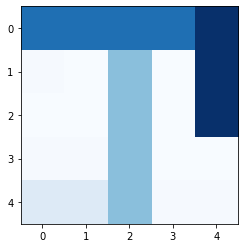

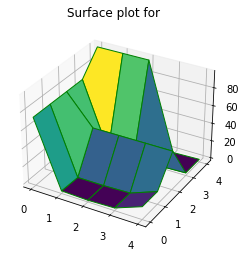

Run: 4
Team: 015f334d-99ef-4d4e-aa1e-cff099049366
→ → → → ↓ 

↓ X ↑ X ↓ 

X X ↑ X ↓ 

→ → ↑ X X 

↑ ↑ ↑ ← ← 



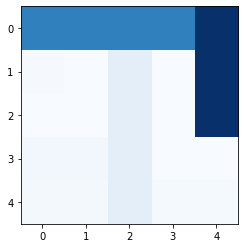

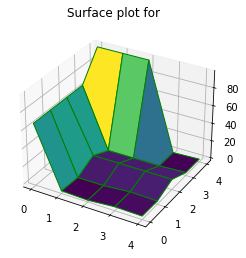

In [17]:
# importing libraries
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

for run in range(runs):
    for team in run_winners[run]['winners']:

        print(f'Run: {run}')
        print(f'Team: {team.id}')
        
        region_action_scores = []
        for learner in team.learners:
            if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
                region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
            else:
                region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

        sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)
        # print(sorted_region_action_scores)
        # for record in sorted_region_action_scores:
        #     print(record)
        action_states = []
        for record in sorted_region_action_scores:
            action = ''
            if record['action'] == 0:
                action = '\u2191'
            elif record['action'] == 1:
                action = '\u2193'
            elif record['action'] == 2:
                action = '\u2192'
            elif record['action'] == 3:
                action = '\u2190'

            for i in range(record['region'][3] - record['region'][2]+1):
                state = [0, 0]
                state[record['region'][0]] = record['region'][1]
                state[not record['region'][0]] = record['region'][2] + i

                # ensure we do not enter duplicate states
                found = 0
                for pair in action_states:
                    if pair['state'] == (state[0], state[1]):
                        found = 1

                if found == 0:
                    action_states.append({'state': (state[0], state[1]), 'action': action, 'q': record['q'] })

        # add in the rest of the states, either they are not visited, or illegal
        for n in reversed(range(env.rows)):
            for m in range(env.cols):
                action = ''
                found = 0
                for record in action_states:
                    if record['state'] == (n, m):
                        found = 1
                        action = record['action']
        #                 action = float(round(record['q'], 0))
                if found == 0:
                    if not env.check_legal((n, m)):
                        action = 'X'
                    else:
                        action = '?'
                print(f'{action} ', end='')
            print('\n')


        q_map = np.zeros((env.rows, env.cols))

        # add in the rest of the states, either they are not visited, or illegal
        for n in range(env.rows):
            for m in range(env.cols):
                action = ''
                found = 0
                for record in action_states:
                    if record['state'] == (n, m):
                        found = 1
                        action = record['q']
                if found == 0:
                    if not env.check_legal((n, m)):
                        action = -1
                    else:
                        action = 0
                q_map[(env.rows-1)-n][m] = action

        plt.imshow(q_map, cmap='Blues', interpolation='nearest')
        plt.show()

        x = []
        y = []
        for i in range(env.cols):
            x.append(i)
            y.append(i)

        Y, X = np.meshgrid(x, y)

        fig = plt.figure()

        # syntax for 3-D plotting
        ax = plt.axes(projection ='3d')

        # syntax for plotting
        ax.plot_surface(X, Y, q_map, cmap ='viridis', edgecolor ='green')
        ax.set_title(f'Surface plot for {envName}')
        plt.show()

## Heatmap (RL)

In [18]:
for run in range(runs):
    for team in run_winners[run]['winners']:

        print(f'Run: {run}')
        print(f'Team: {team.id}')
        
        region_action_scores = []
        for learner in team.learners:
            if learner.program.rule.value_set[0] > learner.program.rule.value_set[1]:
                region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[0], 'q': learner.program.rule.value_set[0]})
            else:
                region_action_scores.append({'region': learner.program.rule.region, 'action': learner.program.rule.action_set[1], 'q': learner.program.rule.value_set[1]})

        sorted_region_action_scores = sorted(region_action_scores, key=lambda value: float(value['q']), reverse=True)

        state_counts = []

        for n in reversed(range(env.rows)):
            for m in range(env.cols):
                state_count = 0
                for record in sorted_region_action_scores:
                    for i in range(record['region'][3] - record['region'][2]+1):
                        state = [0, 0]
                        state[record['region'][0]] = record['region'][1]
                        state[not record['region'][0]] = record['region'][2] + i

                        if state == [n, m]:
                            state_count += 1
                        # state count logic goes here
                state_counts.append({'state': (n, m), 'count': state_count})

        for n in reversed(range(env.rows)):
            for m in range(env.cols):
                for record in state_counts:
                    if (n, m) == record['state']:
                        count = record['count']
                        print(f'{count} ', end='')
            print('')

Run: 0
Team: 75c494b9-e090-42f9-888e-bed5cc66e88a
1 1 1 1 1 
0 0 1 0 1 
0 0 1 0 1 
0 0 1 0 0 
1 1 1 1 1 
Run: 0
Team: ab9df225-63e0-4854-883a-2d8545354869
2 2 1 2 2 
0 0 2 0 1 
0 0 2 0 1 
0 0 2 0 0 
1 1 2 1 1 
Run: 0
Team: 802170b0-239f-4da7-8f7d-61d593dc08a0
1 3 7 3 3 
2 0 5 0 1 
0 0 5 0 1 
3 4 4 0 0 
4 3 4 3 3 
Run: 0
Team: 8e38207a-d768-4e91-ac9d-04bac0751865
3 5 9 5 5 
2 0 9 0 1 
0 0 9 0 1 
6 7 8 0 0 
6 5 9 5 5 
Run: 0
Team: 12341464-008c-46a2-a628-284d4f9b87b9
3 5 9 5 5 
2 0 9 0 1 
0 0 9 0 1 
6 7 8 0 0 
6 5 9 5 5 
Run: 1
Team: bd3254d7-8aa1-4a8b-aa4b-c57cce1c3133
2 2 4 2 2 
0 0 5 0 1 
0 0 5 0 1 
3 3 7 0 0 
6 6 5 6 6 
Run: 1
Team: 231f0f85-7b96-4bb8-ad55-929d05ca2789
2 2 4 2 2 
0 0 5 0 1 
0 0 5 0 1 
3 3 7 0 0 
6 6 5 6 6 
Run: 1
Team: 0d57321b-9bfd-4797-bab9-9635cffb8ba2
2 2 5 2 2 
0 0 6 0 1 
0 0 6 0 1 
4 4 7 0 0 
6 6 6 6 6 
Run: 1
Team: c7387e3a-0aa1-409b-8b4a-504fe77a9e66
2 3 6 3 3 
1 0 6 0 1 
0 0 6 0 1 
4 4 7 0 0 
6 6 6 6 6 
Run: 2
Team: c3e0601e-f0e8-45dd-8f38-f663ed43faa4
1 2 3

In [19]:
# print(team.gp_query_env)
# print(gp_query_env)
for query_total in gp_query_runs:
    print(query_total)


2422
320
802
1436
2000
2422
